In [36]:
# Plot the data we get from running instrumented lean on speedcenter.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from datetime import timedelta
import seaborn as sns
import matplotlib

def setGlobalDefaults():
    ## Use TrueType fonts instead of Type 3 fonts
    #
    # Type 3 fonts embed bitmaps and are not allowed in camera-ready submissions
    # for many conferences. TrueType fonts look better and are accepted.
    # This follows: https://www.conference-publishing.com/Help.php
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42

    ## Enable tight_layout by default
    #
    # This ensures the plot has always sufficient space for legends, ...
    # Without this sometimes parts of the figure would be cut off.
    matplotlib.rcParams['figure.autolayout'] = True

    ## Legend defaults
    matplotlib.rcParams['legend.frameon'] = False
    
    # Hide the right and top spines
    #
    # This reduces the number of lines in the plot. Lines typically catch
    # a readers attention and distract the reader from the actual content.
    # By removing unnecessary spines, we help the reader to focus on
    # the figures in the graph.
    matplotlib.rcParams['axes.spines.right'] = False
    matplotlib.rcParams['axes.spines.top'] = False

matplotlib.rcParams['figure.figsize'] = 5, 2

# Color palette
light_gray = "#cacaca"
dark_gray = "#827b7b"
light_blue = "#a6cee3"
dark_blue = "#1f78b4"
light_green = "#b2df8a"
dark_green = "#33a02c"
light_red = "#fb9a99"
dark_red = "#e31a1c"
black = "#000000"
white = "#ffffff"
setGlobalDefaults()

%pwd
%ls outputs/benchmarks-allocator-log-noreuse.csv

outputs/benchmarks-allocator-log-noreuse.csv


In [37]:
noreuse = pd.read_csv('outputs/benchmarks-allocator-log-noreuse.csv',
  names=["File", "Metric", "Value"])
reuse = pd.read_csv('outputs/benchmarks-allocator-log-reuse.csv', 
                      names=["File", "Metric", "Value"])
print("noreuse"); display(noreuse);
print("reuse"); display(reuse);

noreuse


,File,Metric,Value
0,binarytrees.lean,rss,37224448
1,binarytrees.lean,num_alloc,2922
2,binarytrees.lean,num_small_alloc,1611361
3,binarytrees.lean,num_dealloc,101
4,binarytrees.lean,num_small_dealloc,1600945
...,...,...,...
58,unionfind.lean,num_small_dealloc,2945626
59,unionfind.lean,num_segments,1
60,unionfind.lean,num_pages,769
61,unionfind.lean,num_exports,0


reuse


,File,Metric,Value
0,binarytrees.lean,rss,37355520
1,binarytrees.lean,num_alloc,2922
2,binarytrees.lean,num_small_alloc,1611361
3,binarytrees.lean,num_dealloc,101
4,binarytrees.lean,num_small_dealloc,1600945
...,...,...,...
58,unionfind.lean,num_small_dealloc,2945627
59,unionfind.lean,num_segments,1
60,unionfind.lean,num_pages,769
61,unionfind.lean,num_exports,0


In [38]:
df_merged = pd.merge(reuse, noreuse, on=["File", "Metric"], suffixes=('_reuse', '_no_reuse'))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(df_merged)
    

                File              Metric  Value_reuse  Value_no_reuse
0   binarytrees.lean                 rss     37355520        37224448
1   binarytrees.lean           num_alloc         2922            2922
2   binarytrees.lean     num_small_alloc      1611361         1611361
3   binarytrees.lean         num_dealloc          101             101
4   binarytrees.lean   num_small_dealloc      1600945         1600945
5   binarytrees.lean        num_segments            7               7
6   binarytrees.lean           num_pages         3783            3783
7   binarytrees.lean         num_exports            0               0
8   binarytrees.lean  num_recycled_pages         2448            2448
9    const_fold.lean                 rss     18087936        18219008
10   const_fold.lean           num_alloc         2876            2876
11   const_fold.lean     num_small_alloc       109323          109322
12   const_fold.lean         num_dealloc           55              55
13   const_fold.lean

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease,xDecrease
0,liasolver.lean,49152000,50987008,1835008,3.598972,0.035990
1,rbmap.lean,14680064,14942208,262144,1.754386,0.017544
2,unionfind.lean,13365248,13492224,126976,0.941105,0.009411
3,const_fold.lean,18087936,18219008,131072,0.719424,0.007194
4,deriv.lean,67371008,67502080,131072,0.194175,0.001942
5,rbmap_fbip.lean,10616832,10616832,0,0.000000,0.000000
6,binarytrees.lean,37355520,37224448,-131072,-0.352113,-0.003521


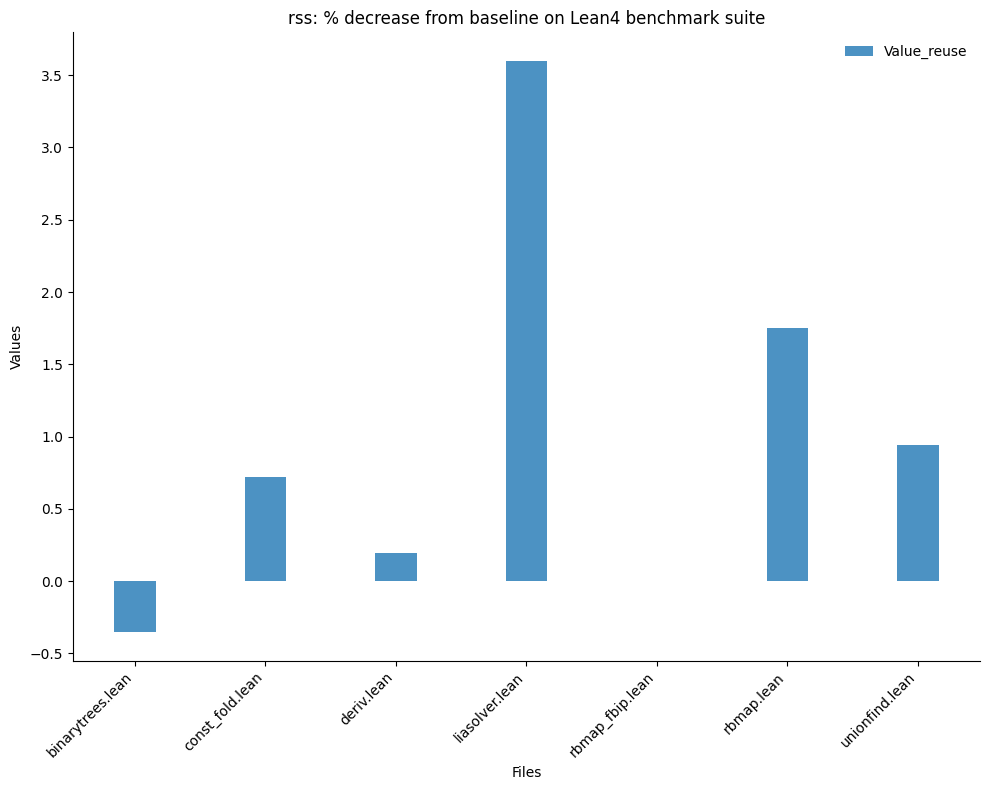

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease,xDecrease
0,deriv.lean,3326016,3326017,1,0.000030,3.006599e-07
1,binarytrees.lean,1611361,1611361,0,0.000000,0.000000e+00
2,rbmap_fbip.lean,11003,11003,0,0.000000,0.000000e+00
3,unionfind.lean,2956048,2956047,-1,-0.000034,-3.382896e-07
4,liasolver.lean,8261186,8261166,-20,-0.000242,-2.420966e-06
5,rbmap.lean,111010,111009,-1,-0.000901,-9.008279e-06
6,const_fold.lean,109323,109322,-1,-0.000915,-9.147290e-06


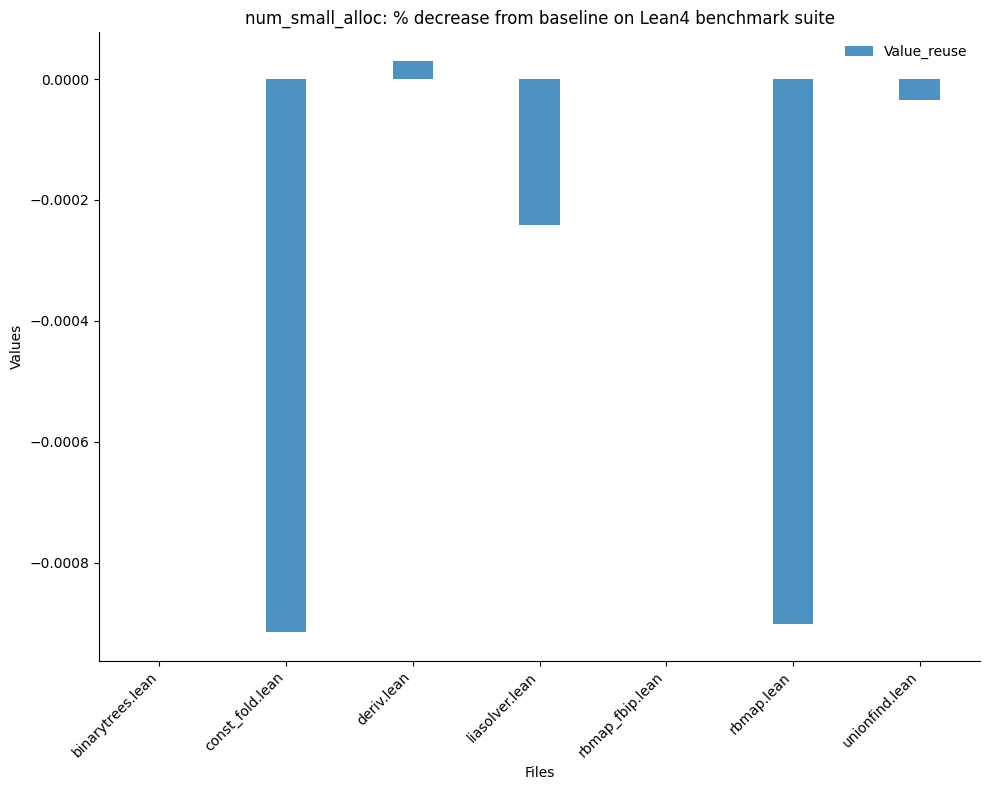

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease,xDecrease
0,deriv.lean,3315584,3315585,1,0.000030,3.016059e-07
1,binarytrees.lean,1600945,1600945,0,0.000000,0.000000e+00
2,rbmap_fbip.lean,592,592,0,0.000000,0.000000e+00
3,unionfind.lean,2945627,2945626,-1,-0.000034,-3.394864e-07
4,liasolver.lean,8117410,8117401,-9,-0.000111,-1.108729e-06
5,rbmap.lean,100599,100598,-1,-0.000994,-9.940555e-06
6,const_fold.lean,98907,98906,-1,-0.001011,-1.011061e-05


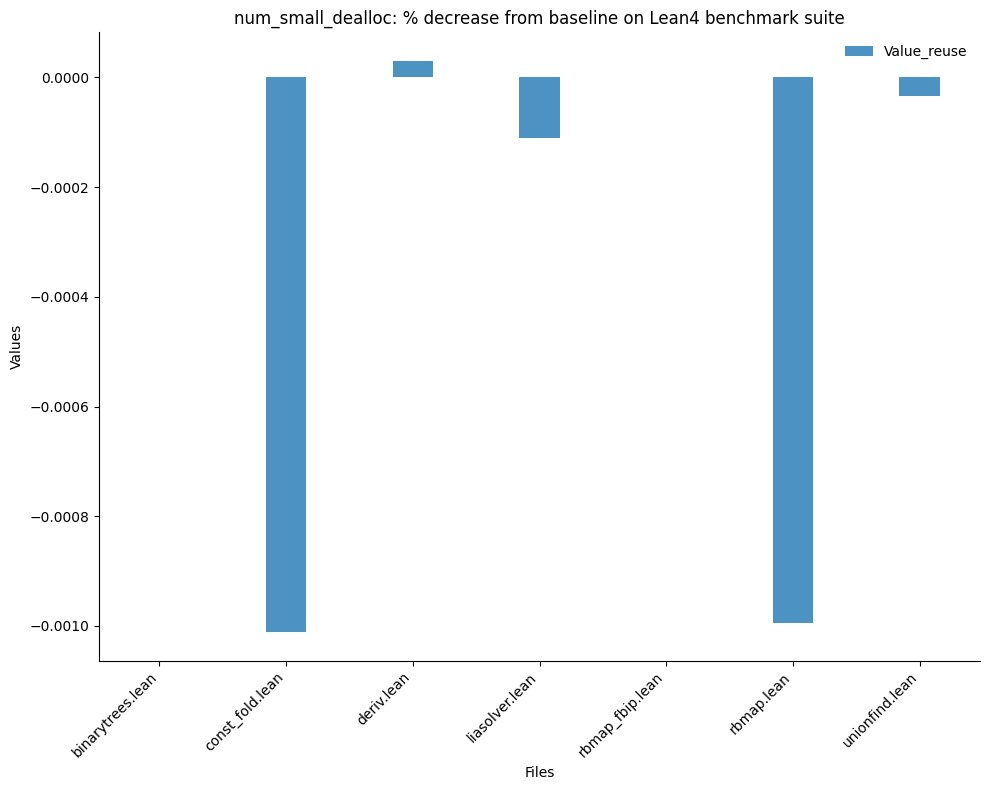

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease,xDecrease
0,binarytrees.lean,2922,2922,0,0.000000,0.000000
1,const_fold.lean,2876,2876,0,0.000000,0.000000
2,deriv.lean,2911,2911,0,0.000000,0.000000
3,rbmap_fbip.lean,2867,2867,0,0.000000,0.000000
4,rbmap.lean,2868,2868,0,0.000000,0.000000
5,unionfind.lean,2891,2891,0,0.000000,0.000000
6,liasolver.lean,65075,65065,-10,-0.015369,-0.000154


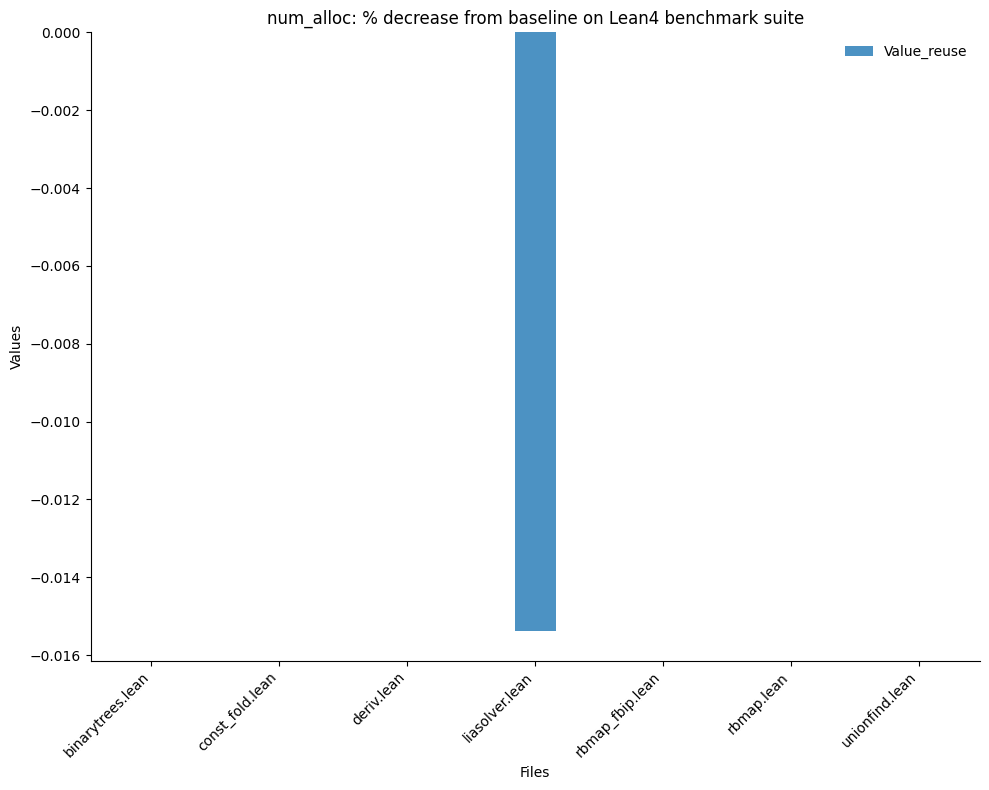

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease,xDecrease
0,binarytrees.lean,101,101,0,0.000000,0.000000
1,const_fold.lean,55,55,0,0.000000,0.000000
2,deriv.lean,87,87,0,0.000000,0.000000
3,rbmap_fbip.lean,52,52,0,0.000000,0.000000
4,rbmap.lean,53,53,0,0.000000,0.000000
5,unionfind.lean,69,69,0,0.000000,0.000000
6,liasolver.lean,36046,36043,-3,-0.008323,-0.000083


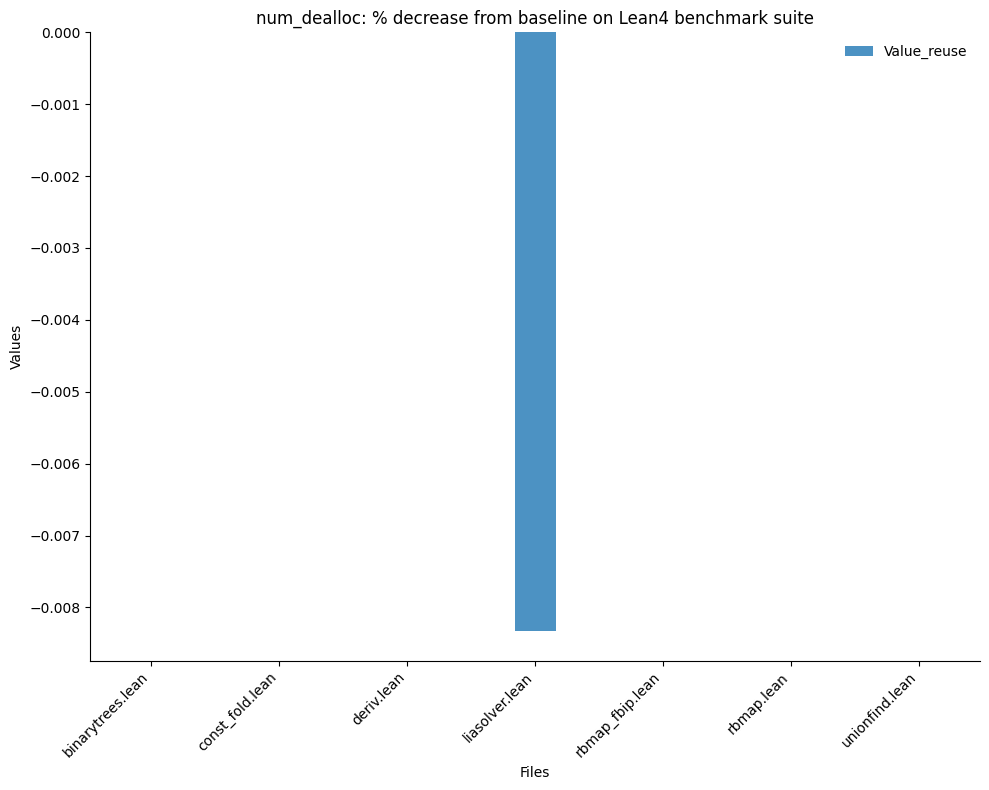

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease,xDecrease
0,liasolver.lean,1425,1426,1,0.070126,0.000701
1,binarytrees.lean,3783,3783,0,0.000000,0.000000
2,const_fold.lean,797,797,0,0.000000,0.000000
3,deriv.lean,7449,7449,0,0.000000,0.000000
4,rbmap_fbip.lean,552,552,0,0.000000,0.000000
5,rbmap.lean,1045,1045,0,0.000000,0.000000
6,unionfind.lean,769,769,0,0.000000,0.000000


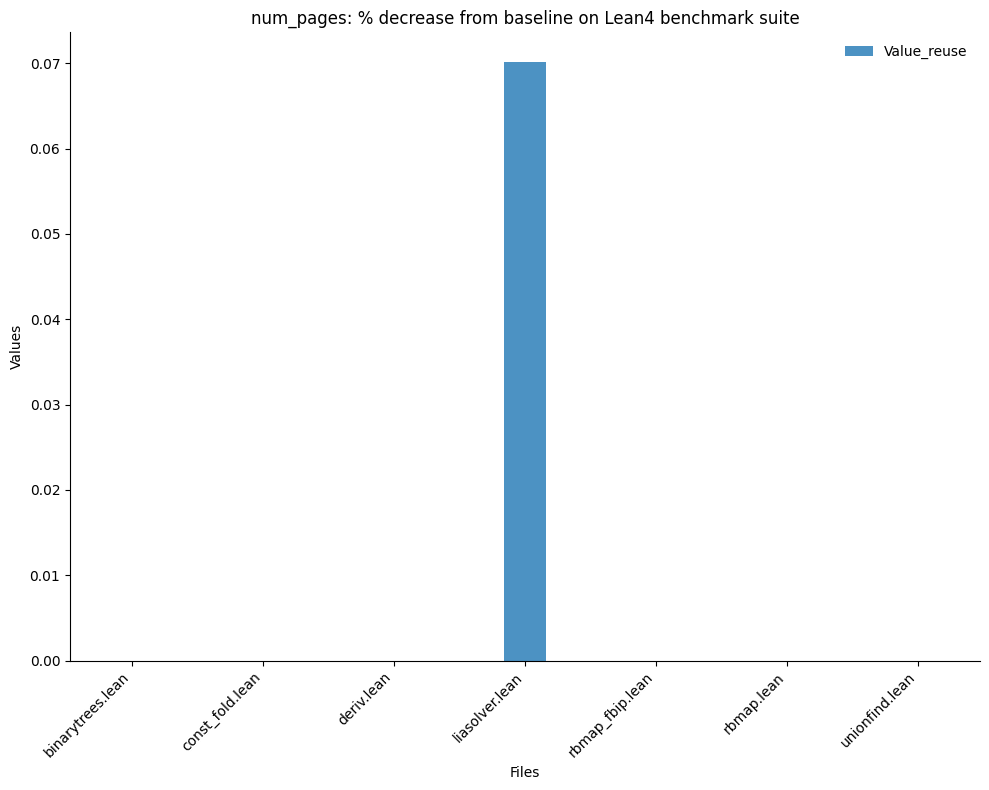

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease,xDecrease
0,binarytrees.lean,2448,2448,0,0.0,0.0
1,const_fold.lean,269,269,0,0.0,0.0
2,deriv.lean,6898,6898,0,0.0,0.0
3,liasolver.lean,7583,7583,0,0.0,0.0
4,rbmap.lean,492,492,0,0.0,0.0
5,unionfind.lean,679,679,0,0.0,0.0
6,rbmap_fbip.lean,0,0,0,NaN,NaN


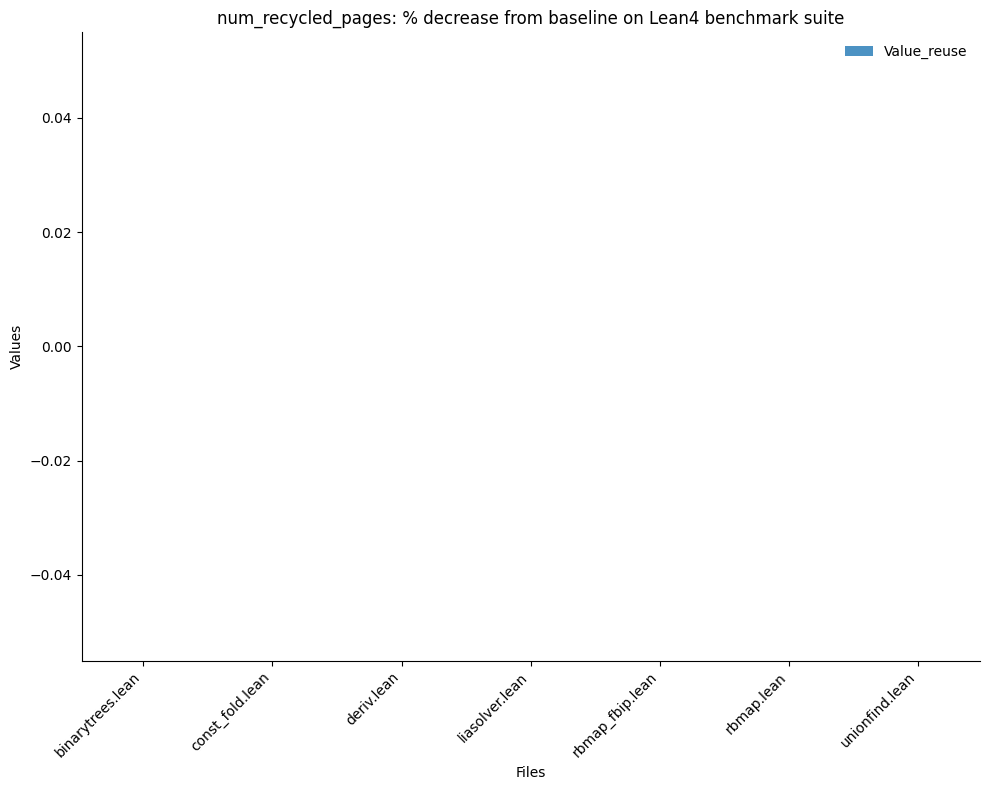

In [43]:
# metrics for which we should compute decreases
df_corr = pd.DataFrame(df_merged["File"].unique(), columns=["File"]) 
metrics = df_merged['Metric'].unique()
files = df_merged["File"].unique()

for metric in ["rss", "num_small_alloc", "num_small_dealloc", "num_alloc",  "num_dealloc", "num_pages", "num_recycled_pages"]:
  display(HTML(f"<h1>{metric}</h1>"))
  df_metric = df_merged[df_merged["Metric"] == metric].copy()
  df_metric["absolute_diff"] = df_merged["Value_no_reuse"] - df_merged["Value_reuse"]
  df_metric["%Decrease"] = (
    100.0 * (df_merged["Value_no_reuse"] - df_merged["Value_reuse"]) / df_merged["Value_no_reuse"]
  )
  df_metric["xDecrease"] = (
    (df_merged["Value_no_reuse"] - df_merged["Value_reuse"]) / df_merged["Value_no_reuse"]
  )

  df_metric = df_metric.drop(["Metric"], axis=1)

  df_kv = df_metric[["File", "%Decrease"]].copy()
  df_kv.rename(columns={"%Decrease": metric}, inplace=True)
  # df_corr = pd.merge(df_corr, df_kv, on="File", how="outer")
  
  # Sorting by maximum decrease
  df_metric_sorted = df_metric.sort_values(by="%Decrease", ascending=False)
  df_metric_sorted.reset_index(drop=True, inplace=True) # changes index to start from zero.
  display(df_metric_sorted)
  
  fig, ax = plt.subplots(figsize=(10, 8))

  index = range(len(files))

  bar_width = 0.32
  opacity = 0.8

  reuse_bar = ax.bar(index, df_metric['%Decrease'], bar_width, alpha=opacity, label='Value_reuse')

  ax.set_xlabel('Files')
  ax.set_ylabel('Values')
  ax.set_title(f'{metric}: % decrease from baseline on Lean4 benchmark suite')
  ax.set_xticks([p for p in index])
  ax.set_xticklabels(files, rotation=45, ha="right")
  ax.legend()

  plt.tight_layout()
  plt.show()

# corr = df_corr.drop('File', axis=1).corr()  # Assuming df_corr is defined and populated
# plt.figure(figsize=(12,8))
# sns.heatmap(corr, cmap="Greens",annot=True)
